In [1]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import Markdown as md
import pandas as pd

InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

time_zone = 'Asia/Jakarta'

In [2]:
import data_source
import yfinance as yf
from datetime import datetime, timedelta

In [3]:
tickers_sheet = 'tickers'
tickers = pd.read_excel('output_preprocessing.xlsx', sheet_name=tickers_sheet)

In [4]:
start_date = '2022-12-14'
event_date = '2022-12-21'
end_date = '2022-12-29'

start_time = datetime.strptime(start_date, '%Y-%m-%d')
end_time = datetime.strptime(end_date, '%Y-%m-%d')

In [5]:
def generate_returns_of_market(start_time: datetime, end_time: datetime) -> pd.DataFrame:
    market_ticker = data_source.ticker_market
    market = yf.Ticker(ticker=market_ticker)

    result = market.history(start=start_time, end=end_time)
    returns_of_market = result['Close'].pct_change()[1:].to_frame()

    return_column_name = "return"
    first_column_name = returns_of_market.columns[0]
    returns_of_market.rename(columns={first_column_name: return_column_name}, inplace=True)

    return returns_of_market

In [6]:
returns_of_market = generate_returns_of_market(start_time=start_time, end_time=end_time)
returns_of_market

,return
Date,
2022-12-15 00:00:00+07:00,-0.007335
2022-12-16 00:00:00+07:00,0.008936
2022-12-19 00:00:00+07:00,-0.004770
2022-12-20 00:00:00+07:00,-0.001679
2022-12-21 00:00:00+07:00,0.007734
2022-12-22 00:00:00+07:00,0.000553
2022-12-23 00:00:00+07:00,-0.003482
2022-12-26 00:00:00+07:00,0.005166
2022-12-27 00:00:00+07:00,0.012759


In [7]:
def generate_stock_prices(start_time: datetime, end_time: datetime, tickers: pd.DataFrame, is_more_related: bool) -> pd.DataFrame:
    classified_tickers_list = tickers[tickers['is_more_related'] == is_more_related]['ticker'].to_list()

    tickers_prices = yf.download(tickers=classified_tickers_list, start=start_time, end=end_time)
    tickers_close_prices = tickers_prices['Close'].dropna(axis=1)

    return tickers_close_prices

In [8]:
is_more_related = False
tickers_stock_prices = generate_stock_prices(start_time=start_time, end_time=end_time, tickers=tickers, is_more_related=is_more_related)
tickers_stock_prices

[*********************100%***********************]  243 of 243 completed


,ABBA.JK,ABDA.JK,ACES.JK,ADMF.JK,AGRO.JK,AGRS.JK,AHAP.JK,AKKU.JK,AKSI.JK,AMAG.JK,APIC.JK,ARGO.JK,ARTA.JK,ARTO.JK,ASBI.JK,ASDM.JK,ASJT.JK,ASMI.JK,ASRM.JK,ASSA.JK,ATIC.JK,AUTO.JK,BABP.JK,BACA.JK,BATA.JK,BAYU.JK,BBCA.JK,BBHI.JK,BBKP.JK,BBLD.JK,BBMD.JK,BBNI.JK,BBRI.JK,BBTN.JK,BBYB.JK,BCAP.JK,BCIC.JK,BDMN.JK,BEKS.JK,BELL.JK,BFIN.JK,BGTG.JK,BIMA.JK,BINA.JK,BIRD.JK,BJBR.JK,BJTM.JK,BKSW.JK,BLTA.JK,BLTZ.JK,BMAS.JK,BMRI.JK,BNBA.JK,BNGA.JK,BNII.JK,BNLI.JK,BOGA.JK,BOLT.JK,BPFI.JK,BPII.JK,BPTR.JK,BRAM.JK,BRIS.JK,BSIM.JK,BSWD.JK,BTPN.JK,BTPS.JK,BUVA.JK,BVIC.JK,CARS.JK,CASA.JK,CFIN.JK,CINT.JK,CMPP.JK,CNTX.JK,CSAP.JK,DEAL.JK,DEFI.JK,DFAM.JK,DIGI.JK,DIVA.JK,DNAR.JK,DNET.JK,DUCK.JK,DVLA.JK,ECII.JK,EMTK.JK,ERAA.JK,ERTX.JK,ESTI.JK,FAST.JK,FILM.JK,FORU.JK,GDYR.JK,GEMA.JK,GIAA.JK,GJTL.JK,GLOB.JK,GSMF.JK,HDFA.JK,HEAL.JK,HELI.JK,HOME.JK,HOTL.JK,HRTA.JK,IBFN.JK,IIKP.JK,IKAI.JK,IMAS.JK,IMJS.JK,INAF.JK,INDR.JK,INDS.JK,INPC.JK,JGLE.JK,JIHD.JK,JMAS.JK,JSPT.JK,KAEF.JK,KICI.JK,KIOS.JK,KLBF.JK,KPIG.JK,KREN.JK,LMAS.JK,LMPI.JK,LPGI.JK,LPIN.JK,LPPF.JK,LPPS.JK,LRNA.JK,LUCK.JK,MABA.JK,MAMI.JK,MAPA.JK,MAPB.JK,MAPI.JK,MARI.JK,MASA.JK,MAYA.JK,MCAS.JK,MCOR.JK,MDIA.JK,MEGA.JK,MERK.JK,MFIN.JK,MGNA.JK,MICE.JK,MIKA.JK,MINA.JK,MIRA.JK,MKNT.JK,MLPT.JK,MNCN.JK,MPMX.JK,MREI.JK,MSIN.JK,MSKY.JK,MTDL.JK,MTWI.JK,MYTX.JK,NASA.JK,NELY.JK,NFCX.JK,NICK.JK,NISP.JK,NOBU.JK,NUSA.JK,OCAP.JK,PADI.JK,PANR.JK,PANS.JK,PBRX.JK,PDES.JK,PEGE.JK,PEHA.JK,PGLI.JK,PJAA.JK,PNBN.JK,PNBS.JK,PNIN.JK,PNLF.JK,PNSE.JK,POLA.JK,POLY.JK,POOL.JK,PRAS.JK,PRDA.JK,PRIM.JK,PSKT.JK,PTSN.JK,PTSP.JK,PYFA.JK,PZZA.JK,RALS.JK,RELI.JK,RICY.JK,SAFE.JK,SAME.JK,SAPX.JK,SCMA.JK,SDMU.JK,SDRA.JK,SHID.JK,SIDO.JK,SILO.JK,SKYB.JK,SMDR.JK,SMMA.JK,SMSM.JK,SONA.JK,SOTS.JK,SRAJ.JK,SRIL.JK,SRTG.JK,SSTM.JK,STAR.JK,TAXI.JK,TELE.JK,TFCO.JK,TIFA.JK,TMAS.JK,TMPO.JK,TNCA.JK,TRIM.JK,TRIS.JK,TRUK.JK,TRUS.JK,TSPC.JK,TUGU.JK,UNIT.JK,VICO.JK,VINS.JK,VIVA.JK,VRNA.JK,WEHA.JK,WOMF.JK,WOOD.JK,YELO.JK,YULE.JK,ZONE.JK
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-14,163.0,6700.0,426.0,9000.0,458.0,90.0,80.0,50.0,304.0,360.0,1105.0,1070.0,2140.0,4060.0,505.0,950.0,124.0,113.0,1630.0,825.0,402.0,1425.0,106.0,130.0,515.0,965.0,8625.0,1905.0,107.0,585.0,1970.0,9525.0,4980.0,1239.322388,705.0,81.0,126.0,2850.0,50.0,135.0,1080.0,94.0,122.0,3920.0,1535.0,1350.0,700.0,109.0,50.0,2830.0,1135.0,4975.0,1170.0,1225.0,236.0,1055.0,1280.0,750.0,685.0,10800.0,216.0,8175.0,1215.0,850.0,1375.0,2600.0,2840.0,60.0,121.0,82.0,740.0,316.0,220.0,173.0,224.0,800.0,50.0,1455.0,94.0,50.0,830.0,166.0,3750.0,176.0,2400.0,500.0,1075.0,404.0,252.0,54.0,815.0,2060.0,224.0,1400.0,274.0,203.554123,560.0,107.0,81.0,155.0,1550.0,244.0,50.0,50.0,204.0,97.0,50.0,50.0,895.0,310.0,910.0,5900.0,1930.0,78.0,50.0,358.0,117.0,845.0,1150.0,202.0,264.0,2120.0,76.0,50.0,50.0,121.0,5825.0,402.0,5000.0,81.0,189.0,131.0,50.0,50.0,386.0,1810.0,1400.0,148.0,2040.0,530.0,8225.0,83.0,56.0,5500.0,4710.0,1690.0,50.0,500.0,3100.0,83.0,50.0,50.0,2060.0,745.0,1160.0,4720.0,4920.0,228.0,555.0,122.000000,55.0,50.0,308.0,7700.0,174.0,735.0,565.0,50.0,159.0,50.0,374.0,1965.0,118.0,310.0,505.0,715.0,228.0,700.0,1735.0,67.0,1390.0,434.0,418.0,90.0,56.0,50.0,153.0,5900.0,190.0,71.0,192.0,3400.0,955.0,520.0,570.0,545.0,89.0,224.0,274.0,765.0,220.0,74.0,575.0,2450.0,770.0,1285.0,51.0,397.0,12450.0,1555.0,4400.0,308.0,725.0,146.0,2760.0,750.0,140.0,50.0,50.0,695.0,484.0,200.0,120.0,310.0,230.0,194.0,108.0,382.0,1395.0,872.5,316.0,163.0,147.0,50.0,110.0,104.0,264.0,380.0,78.0,2100.0,1195.0
2022-12-15,161.0,6700.0,414.0,9050.0,456.0,92.0,86.0,50.0,294.0,358.0,1105.0,1125.0,2170.0,4040.0,520.0,920.0,128.0,115.0,1630.0,840.0,382.0,1415.0,107.0,131.0,515.0,965.0,8500.0,1895.0,105.0,620.0,1970.0,9475.0,4910.0,1234.880371,750.0,81.0,126.0,2850.0,50.0,134.0,1060.0,94.0,123.0,3920.0,1525.0,1345.0,705.0,109.0,50.0,3110.0

In [9]:
def calculate_tickers_return(tickers_stock_prices: pd.DataFrame) -> pd.DataFrame:
    tickers_return = tickers_stock_prices.pct_change()[1:]
    return tickers_return

In [10]:
tickers_return = calculate_tickers_return(tickers_stock_prices=tickers_stock_prices)
tickers_return

,ABBA.JK,ABDA.JK,ACES.JK,ADMF.JK,AGRO.JK,AGRS.JK,AHAP.JK,AKKU.JK,AKSI.JK,AMAG.JK,APIC.JK,ARGO.JK,ARTA.JK,ARTO.JK,ASBI.JK,ASDM.JK,ASJT.JK,ASMI.JK,ASRM.JK,ASSA.JK,ATIC.JK,AUTO.JK,BABP.JK,BACA.JK,BATA.JK,BAYU.JK,BBCA.JK,BBHI.JK,BBKP.JK,BBLD.JK,BBMD.JK,BBNI.JK,BBRI.JK,BBTN.JK,BBYB.JK,BCAP.JK,BCIC.JK,BDMN.JK,BEKS.JK,BELL.JK,BFIN.JK,BGTG.JK,BIMA.JK,BINA.JK,BIRD.JK,BJBR.JK,BJTM.JK,BKSW.JK,BLTA.JK,BLTZ.JK,BMAS.JK,BMRI.JK,BNBA.JK,BNGA.JK,BNII.JK,BNLI.JK,BOGA.JK,BOLT.JK,BPFI.JK,BPII.JK,BPTR.JK,BRAM.JK,BRIS.JK,BSIM.JK,BSWD.JK,BTPN.JK,BTPS.JK,BUVA.JK,BVIC.JK,CARS.JK,CASA.JK,CFIN.JK,CINT.JK,CMPP.JK,CNTX.JK,CSAP.JK,DEAL.JK,DEFI.JK,DFAM.JK,DIGI.JK,DIVA.JK,DNAR.JK,DNET.JK,DUCK.JK,DVLA.JK,ECII.JK,EMTK.JK,ERAA.JK,ERTX.JK,ESTI.JK,FAST.JK,FILM.JK,FORU.JK,GDYR.JK,GEMA.JK,GIAA.JK,GJTL.JK,GLOB.JK,GSMF.JK,HDFA.JK,HEAL.JK,HELI.JK,HOME.JK,HOTL.JK,HRTA.JK,IBFN.JK,IIKP.JK,IKAI.JK,IMAS.JK,IMJS.JK,INAF.JK,INDR.JK,INDS.JK,INPC.JK,JGLE.JK,JIHD.JK,JMAS.JK,JSPT.JK,KAEF.JK,KICI.JK,KIOS.JK,KLBF.JK,KPIG.JK,KREN.JK,LMAS.JK,LMPI.JK,LPGI.JK,LPIN.JK,LPPF.JK,LPPS.JK,LRNA.JK,LUCK.JK,MABA.JK,MAMI.JK,MAPA.JK,MAPB.JK,MAPI.JK,MARI.JK,MASA.JK,MAYA.JK,MCAS.JK,MCOR.JK,MDIA.JK,MEGA.JK,MERK.JK,MFIN.JK,MGNA.JK,MICE.JK,MIKA.JK,MINA.JK,MIRA.JK,MKNT.JK,MLPT.JK,MNCN.JK,MPMX.JK,MREI.JK,MSIN.JK,MSKY.JK,MTDL.JK,MTWI.JK,MYTX.JK,NASA.JK,NELY.JK,NFCX.JK,NICK.JK,NISP.JK,NOBU.JK,NUSA.JK,OCAP.JK,PADI.JK,PANR.JK,PANS.JK,PBRX.JK,PDES.JK,PEGE.JK,PEHA.JK,PGLI.JK,PJAA.JK,PNBN.JK,PNBS.JK,PNIN.JK,PNLF.JK,PNSE.JK,POLA.JK,POLY.JK,POOL.JK,PRAS.JK,PRDA.JK,PRIM.JK,PSKT.JK,PTSN.JK,PTSP.JK,PYFA.JK,PZZA.JK,RALS.JK,RELI.JK,RICY.JK,SAFE.JK,SAME.JK,SAPX.JK,SCMA.JK,SDMU.JK,SDRA.JK,SHID.JK,SIDO.JK,SILO.JK,SKYB.JK,SMDR.JK,SMMA.JK,SMSM.JK,SONA.JK,SOTS.JK,SRAJ.JK,SRIL.JK,SRTG.JK,SSTM.JK,STAR.JK,TAXI.JK,TELE.JK,TFCO.JK,TIFA.JK,TMAS.JK,TMPO.JK,TNCA.JK,TRIM.JK,TRIS.JK,TRUK.JK,TRUS.JK,TSPC.JK,TUGU.JK,UNIT.JK,VICO.JK,VINS.JK,VIVA.JK,VRNA.JK,WEHA.JK,WOMF.JK,WOOD.JK,YELO.JK,YULE.JK,ZONE.JK
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-15,-0.012270,0.0,-0.028169,0.005556,-0.004367,0.022222,0.075000,0.0,-0.032895,-0.005556,0.000000,0.051402,0.014019,-0.004926,0.029703,-0.031579,0.032258,0.017699,0.000000,0.018182,-0.049751,-0.007018,0.009434,0.007692,0.000000,0.000000,-0.014493,-0.005249,-0.018692,0.059829,0.000000,-0.005249,-0.014056,-0.003584,0.063830,0.000000,0.000000,0.000000,0.0,-0.007407,-0.018519,0.000000,0.008197,0.000000,-0.006515,-0.003704,0.007143,0.000000,0.0,0.098940,0.008811,-0.005025,-0.008547,-0.016327,-0.008475,0.000000,0.003906,0.046667,0.014599,0.00000,0.000000,0.009174,-0.004115,-0.058824,0.0,0.000000,-0.021127,0.0,-0.041322,0.000000,-0.006757,0.000000,0.000000,-0.011561,0.000000,0.000000,0.0,0.0,-0.010638,0.0,0.000000,0.024096,0.013333,0.0,0.004167,0.000000,-0.013953,-0.019802,0.007937,-0.037037,0.036810,-0.004854,0.008929,-0.010714,0.072993,0.0,0.008929,0.000000,0.012346,-0.006452,-0.003226,0.040984,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.021978,-0.008475,0.012953,-0.025641,0.0,0.000000,0.025641,0.000000,0.000000,0.019802,-0.015152,-0.033019,-0.013158,0.0,0.0,-0.008264,0.004292,0.000000,-0.002000,0.098765,0.000000,-0.015267,0.0,0.0,-0.018135,0.000000,-0.028571,-0.006757,0.083333,0.009434,-0.027356,0.000000,-0.017857,0.000000,-0.004246,0.014793,0.0,-0.004000,0.003226,-0.024096,0.0,0.0,0.004854,-0.006711,-0.012931,-0.025424,-0.016260,-0.017544,-0.009009,0.000000,-0.018182,0.0,-0.006494,0.025974,0.011494,-0.006803,-0.008850,0.0,0.0,0.0,-0.042781,0.000000,0.008475,0.000000,-0.045545,-0.006993,0.008772,0.000000,-0.008646,0.014925,-0.010791,-0.004608,0.0,-0.011111,0.000000,0.0,0.000000,-0.004237,-0.005263,-0.014085,-0.010417,-0.067647,-0.005236,0.000000,0.000000,0.073394,0.078652,0.000000,0.029197,0.032680,-0.009091,0.013514,0.000000,-0.040816,-0.012987,0.011673,0.0,-0.005038,0.000000,-0.025723

In [11]:
factor = 30

def select_winner_and_loser_tickers(tickers_stock_prices: pd.DataFrame, event_date: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    event_timestamp = pd.Timestamp(f'{event_date} 00:00:00')

    initial_stock_price_series = tickers_stock_prices.iloc[1]
    event_stock_price_series = tickers_stock_prices.loc[event_timestamp]
    formation_return_rate_series =  (event_stock_price_series - initial_stock_price_series) / initial_stock_price_series
    formation_return_rate_series = formation_return_rate_series.sort_values(ascending=False)
    

    winners_series = formation_return_rate_series[:factor]
    losers_series = formation_return_rate_series[-factor:]

    winner_tickers_list = winners_series.index.to_list()
    loser_tickers_list = losers_series.index.to_list()

    winner_tickers_return = tickers_return[winner_tickers_list]
    loser_tickers_return = tickers_return[loser_tickers_list]

    return winner_tickers_return, loser_tickers_return


In [12]:
winner_tickers_return, loser_tickers_return = select_winner_and_loser_tickers(tickers_stock_prices=tickers_stock_prices, event_date=event_date)
winner_tickers_return
loser_tickers_return

,BLTZ.JK,ERTX.JK,PANR.JK,HELI.JK,PGLI.JK,TRIS.JK,SAME.JK,PTSP.JK,WEHA.JK,CMPP.JK,ARTA.JK,BSIM.JK,SDMU.JK,DNET.JK,YULE.JK,BELL.JK,ECII.JK,BATA.JK,GLOB.JK,MAPI.JK,ACES.JK,ZONE.JK,MREI.JK,POLA.JK,IMJS.JK,BAYU.JK,KLBF.JK,MASA.JK,DFAM.JK,ATIC.JK
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-15,0.098940,0.007937,-0.042781,0.040984,0.008772,-0.056701,0.029197,-0.067647,-0.009615,-0.011561,0.014019,-0.058824,0.013514,0.013333,0.000000,-0.007407,0.000000,0.000000,0.000000,-0.028571,-0.028169,0.008368,-0.025424,-0.011111,0.000000,0.000000,-0.033019,0.083333,-0.010638,-0.049751
2022-12-16,0.099678,0.055118,0.027933,-0.031496,0.017391,0.087432,0.042553,0.097792,0.019417,-0.005848,0.059908,0.075000,0.000000,0.013158,0.000000,0.052239,0.000000,0.000000,0.065421,-0.040441,-0.038647,0.012448,-0.004348,0.022472,0.012903,0.000000,0.034146,0.022624,0.010753,0.036649
2022-12-19,0.099415,0.171642,-0.016304,0.040650,0.008547,-0.035176,0.061224,0.000000,0.000000,0.000000,-0.017391,-0.023256,-0.026667,0.000000,0.000000,-0.035461,-0.004000,0.000000,-0.017544,0.022989,0.055276,0.012295,0.034934,-0.010989,0.000000,0.031088,0.023585,-0.013274,0.010638,0.000000
2022-12-20,0.098404,0.012739,0.093923,0.250000,0.033898,-0.031250,-0.006410,0.000000,0.047619,-0.011765,0.000000,0.029762,0.027397,0.000000,0.000000,-0.007353,0.054217,0.048544,-0.035714,0.074906,0.023810,0.012146,0.023207,0.011111,-0.019108,0.000000,-0.032258,0.000000,0.000000,-0.005051
2022-12-21,0.099274,0.144654,0.095960,-0.068750,0.098361,0.129032,0.000000,0.000000,0.009091,0.095238,0.026549,-0.017341,0.053333,0.038961,0.052381,0.044444,0.000000,0.000000,0.037037,-0.010453,0.000000,0.000000,-0.016495,0.010989,0.038961,0.000000,0.000000,0.013453,0.000000,-0.010152
2022-12-22,0.000000,-0.065934,0.023041,-0.067114,0.037313,0.142857,0.045161,-0.020115,0.009009,0.097826,0.086207,-0.011765,-0.050633,0.007500,-0.004525,0.000000,0.000000,-0.046296,0.000000,0.003521,0.130233,-0.032000,0.000000,-0.010870,-0.025000,0.005025,-0.019048,-0.004425,0.010526,0.000000
2022-12-23,-0.068282,0.011765,-0.027027,-0.064748,0.079137,0.225000,-0.012346,0.000000,-0.017857,0.099010,0.067460,0.017857,0.000000,0.002481,0.000000,0.035461,0.000000,0.000000,-0.053571,0.014035,-0.012346,-0.008264,-0.006289,-0.010989,-0.006410,0.000000,-0.009709,-0.022222,-0.020833,0.000000
2022-12-26,0.000000,0.052326,0.013889,0.053846,0.106667,-0.068027,0.000000,0.000000,0.009091,-0.063063,-0.033457,0.000000,0.066667,0.014851,0.000000,-0.006849,0.000000,0.000000,0.047170,-0.044983,0.041667,0.020833,0.012658,0.000000,-0.019355,0.000000,0.014706,0.050000,0.000000,-0.015385
2022-12-27,-0.068558,0.248619,0.027397,0.000000,-0.030120,-0.065693,-0.012500,0.000000,0.018018,-0.043269,-0.042308,-0.017544,-0.050000,0.000000,0.000000,-0.020690,0.000000,0.009709,-0.045045,0.021739,-0.016000,0.000000,-0.014583,0.011111,-0.013158,0.000000,-0.019324,-0.017316,0.000000,0.000000


,ABBA.JK,KICI.JK,PYFA.JK,BABP.JK,PEGE.JK,MDIA.JK,PNBS.JK,BPTR.JK,TRUS.JK,INPC.JK,ASSA.JK,PNIN.JK,PBRX.JK,ARTO.JK,PRIM.JK,RICY.JK,BVIC.JK,TUGU.JK,MINA.JK,LPPS.JK,PNBN.JK,BGTG.JK,SRAJ.JK,CARS.JK,YELO.JK,MTWI.JK,PNLF.JK,GEMA.JK,BNBA.JK,BBYB.JK
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-15,-0.012270,0.019802,-0.005236,0.009434,-0.045545,-0.017857,0.014925,0.000000,0.000000,-0.025641,0.018182,-0.010791,0.008475,-0.004926,-0.005263,0.078652,-0.041322,-0.048711,-0.024096,0.098765,-0.008646,0.000000,0.006897,0.000000,0.025641,0.000000,-0.004608,0.072993,-0.008547,0.063830
2022-12-16,0.006211,0.000000,-0.010526,-0.018692,-0.037344,-0.018182,-0.014706,0.009259,-0.010471,-0.026316,-0.017857,0.014545,-0.025210,0.004950,-0.005291,-0.052083,-0.017241,-0.030120,-0.061728,-0.067416,0.008721,-0.021277,-0.013699,-0.012195,-0.012500,-0.008197,-0.009259,-0.047619,-0.030172,-0.020000
2022-12-19,-0.012346,-0.009709,-0.026596,-0.019048,0.000000,-0.037037,0.000000,-0.036697,-0.015873,-0.013514,-0.054545,-0.010753,-0.008621,-0.054187,-0.047872,0.000000,-0.017544,-0.012422,-0.065789,-0.024096,-0.017291,-0.032609,-0.069444,-0.037037,-0.012658,-0.027071,0.004673,-0.064286,-0.004444,-0.027211
2022-12-20,-0.043750,-0.019608,0.027322,-0.009709,0.000000,0.000000,-0.044776,-0.019048,-0.032258,0.000000,-0.012821,-0.068841,-0.052174,-0.054688,-0.011173,-0.065934,-0.035714,-0.025157,-0.056338,0.000000,-0.067449,0.000000,-0.029851,-0.038462,-0.025641,-0.066116,-0.069767,0.000000,-0.066964,-0.069930
2022-12-21,-0.013072,-0.035000,-0.053191,-0.019608,-0.034483,-0.019231,-0.015625,-0.029126,-0.022222,-0.041096,0.000000,-0.019455,0.000000,0.013774,-0.028249,0.023529,-0.027778,-0.032258,0.089552,-0.012346,-0.031447,-0.056180,0.000000,-0.026667,-0.065789,-0.017699,-0.065000,-0.045802,-0.066986,-0.060150
2022-12-22,0.026490,-0.005181,-0.005618,0.020000,0.000000,0.039216,0.015873,-0.010000,0.096591,0.014286,0.045455,0.019841,-0.009174,0.000000,0.000000,-0.022989,0.019048,0.000000,0.068493,0.000000,0.038961,0.011905,0.023077,0.054795,-0.056338,-0.009009,0.016043,-0.048000,0.020513,0.016000
2022-12-23,-0.006452,0.031250,0.011299,0.009804,0.008929,-0.018868,0.000000,0.030303,-0.041451,-0.028169,-0.024845,-0.007782,-0.046296,0.016304,0.063953,-0.011765,0.000000,0.066667,-0.064103,0.025000,0.000000,0.000000,0.037594,-0.064935,-0.059701,-0.036364,-0.010526,0.092437,-0.005025,0.023622
2022-12-26,-0.019481,0.000000,0.005587,0.009709,0.000000,-0.019231,0.015625,0.000000,0.000000,0.043478,-0.012739,-0.003922,-0.009709,-0.061497,0.000000,0.011905,0.000000,0.031250,0.041096,0.012195,-0.006250,0.000000,-0.057971,-0.013889,0.063492,0.000000,0.005319,0.038462,-0.020202,0.007692
2022-12-27,0.000000,0.010101,-0.005556,0.009615,-0.013274,-0.019608,-0.015385,-0.009804,-0.037838,-0.013889,0.019355,0.003937,0.166667,0.019943,-0.021858,0.011765,0.000000,0.024242,0.013158,0.000000,-0.031447,0.011765,0.015385,0.056338,-0.014925,0.018128,-0.031746,0.000000,-0.015464,-0.007634


In [13]:
date_column_name = 'date'
ticker_column_name = 'ticker'
return_column_name = 'return'
observation_param_name_for_return = 'param1_r'

In [14]:
def init_observation_df(input_df: pd.DataFrame) -> pd.DataFrame:
  observation_list = []
  for period, row in input_df.iterrows():
    period = period.tz_localize(time_zone)
    for ticker, daily_return in row.items():
      observation_list.append({
          date_column_name: period,
          ticker_column_name: ticker,
          return_column_name: daily_return
      })
  observation_raw_df = pd.DataFrame(observation_list)

  # raw pivot
  observation_df = observation_raw_df.pivot_table(index=date_column_name, columns=ticker_column_name)

  # fixed_pivot
  observation_df.rename(columns={return_column_name: observation_param_name_for_return}, inplace=True)
  observation_df = observation_df.swaplevel(i=0, j=1, axis=1)

  return observation_df

In [15]:
winner_observation_df = init_observation_df(winner_tickers_return)
loser_observation_df = init_observation_df(loser_tickers_return)

md('**The Winners**')
winner_observation_df
print('\n')
md('**The Losers**')
loser_observation_df

**The Winners**

ticker,ACES.JK,ARTA.JK,ATIC.JK,BATA.JK,BAYU.JK,BELL.JK,BLTZ.JK,BSIM.JK,CMPP.JK,DFAM.JK,DNET.JK,ECII.JK,ERTX.JK,GLOB.JK,HELI.JK,IMJS.JK,KLBF.JK,MAPI.JK,MASA.JK,MREI.JK,PANR.JK,PGLI.JK,POLA.JK,PTSP.JK,SAME.JK,SDMU.JK,TRIS.JK,WEHA.JK,YULE.JK,ZONE.JK
,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-15 00:00:00+07:00,-0.028169,0.014019,-0.049751,0.000000,0.000000,-0.007407,0.098940,-0.058824,-0.011561,-0.010638,0.013333,0.000000,0.007937,0.000000,0.040984,0.000000,-0.033019,-0.028571,0.083333,-0.025424,-0.042781,0.008772,-0.011111,-0.067647,0.029197,0.013514,-0.056701,-0.009615,0.000000,0.008368
2022-12-16 00:00:00+07:00,-0.038647,0.059908,0.036649,0.000000,0.000000,0.052239,0.099678,0.075000,-0.005848,0.010753,0.013158,0.000000,0.055118,0.065421,-0.031496,0.012903,0.034146,-0.040441,0.022624,-0.004348,0.027933,0.017391,0.022472,0.097792,0.042553,0.000000,0.087432,0.019417,0.000000,0.012448
2022-12-19 00:00:00+07:00,0.055276,-0.017391,0.000000,0.000000,0.031088,-0.035461,0.099415,-0.023256,0.000000,0.010638,0.000000,-0.004000,0.171642,-0.017544,0.040650,0.000000,0.023585,0.022989,-0.013274,0.034934,-0.016304,0.008547,-0.010989,0.000000,0.061224,-0.026667,-0.035176,0.000000,0.000000,0.012295
2022-12-20 00:00:00+07:00,0.023810,0.000000,-0.005051,0.048544,0.000000,-0.007353,0.098404,0.029762,-0.011765,0.000000,0.000000,0.054217,0.012739,-0.035714,0.250000,-0.019108,-0.032258,0.074906,0.000000,0.023207,0.093923,0.033898,0.011111,0.000000,-0.006410,0.027397,-0.031250,0.047619,0.000000,0.012146
2022-12-21 00:00:00+07:00,0.000000,0.026549,-0.010152,0.000000,0.000000,0.044444,0.099274,-0.017341,0.095238,0.000000,0.038961,0.000000,0.144654,0.037037,-0.068750,0.038961,0.000000,-0.010453,0.013453,-0.016495,0.095960,0.098361,0.010989,0.000000,0.000000,0.053333,0.129032,0.009091,0.052381,0.000000
2022-12-22 00:00:00+07:00,0.130233,0.086207,0.000000,-0.046296,0.005025,0.000000,0.000000,-0.011765,0.097826,0.010526,0.007500,0.000000,-0.065934,0.000000,-0.067114,-0.025000,-0.019048,0.003521,-0.004425,0.000000,0.023041,0.037313,-0.010870,-0.020115,0.045161,-0.050633,0.142857,0.009009,-0.004525,-0.032000
2022-12-23 00:00:00+07:00,-0.012346,0.067460,0.000000,0.000000,0.000000,0.035461,-0.068282,0.017857,0.099010,-0.020833,0.002481,0.000000,0.011765,-0.053571,-0.064748,-0.006410,-0.009709,0.014035,-0.022222,-0.006289,-0.027027,0.079137,-0.010989,0.000000,-0.012346,0.000000,0.225000,-0.017857,0.000000,-0.008264
2022-12-26 00:00:00+07:00,0.041667,-0.033457,-0.015385,0.000000,0.000000,-0.006849,0.000000,0.000000,-0.063063,0.000000,0.014851,0.000000,0.052326,0.047170,0.053846,-0.019355,0.014706,-0.044983,0.050000,0.012658,0.013889,0.106667,0.000000,0.000000,0.000000,0.066667,-0.068027,0.009091,0.000000,0.020833


**The Losers**

ticker,ABBA.JK,ARTO.JK,ASSA.JK,BABP.JK,BBYB.JK,BGTG.JK,BNBA.JK,BPTR.JK,BVIC.JK,CARS.JK,GEMA.JK,INPC.JK,KICI.JK,LPPS.JK,MDIA.JK,MINA.JK,MTWI.JK,PBRX.JK,PEGE.JK,PNBN.JK,PNBS.JK,PNIN.JK,PNLF.JK,PRIM.JK,PYFA.JK,RICY.JK,SRAJ.JK,TRUS.JK,TUGU.JK,YELO.JK
,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-15 00:00:00+07:00,-0.012270,-0.004926,0.018182,0.009434,0.063830,0.000000,-0.008547,0.000000,-0.041322,0.000000,0.072993,-0.025641,0.019802,0.098765,-0.017857,-0.024096,0.000000,0.008475,-0.045545,-0.008646,0.014925,-0.010791,-0.004608,-0.005263,-0.005236,0.078652,0.006897,0.000000,-0.048711,0.025641
2022-12-16 00:00:00+07:00,0.006211,0.004950,-0.017857,-0.018692,-0.020000,-0.021277,-0.030172,0.009259,-0.017241,-0.012195,-0.047619,-0.026316,0.000000,-0.067416,-0.018182,-0.061728,-0.008197,-0.025210,-0.037344,0.008721,-0.014706,0.014545,-0.009259,-0.005291,-0.010526,-0.052083,-0.013699,-0.010471,-0.030120,-0.012500
2022-12-19 00:00:00+07:00,-0.012346,-0.054187,-0.054545,-0.019048,-0.027211,-0.032609,-0.004444,-0.036697,-0.017544,-0.037037,-0.064286,-0.013514,-0.009709,-0.024096,-0.037037,-0.065789,-0.027071,-0.008621,0.000000,-0.017291,0.000000,-0.010753,0.004673,-0.047872,-0.026596,0.000000,-0.069444,-0.015873,-0.012422,-0.012658
2022-12-20 00:00:00+07:00,-0.043750,-0.054688,-0.012821,-0.009709,-0.069930,0.000000,-0.066964,-0.019048,-0.035714,-0.038462,0.000000,0.000000,-0.019608,0.000000,0.000000,-0.056338,-0.066116,-0.052174,0.000000,-0.067449,-0.044776,-0.068841,-0.069767,-0.011173,0.027322,-0.065934,-0.029851,-0.032258,-0.025157,-0.025641
2022-12-21 00:00:00+07:00,-0.013072,0.013774,0.000000,-0.019608,-0.060150,-0.056180,-0.066986,-0.029126,-0.027778,-0.026667,-0.045802,-0.041096,-0.035000,-0.012346,-0.019231,0.089552,-0.017699,0.000000,-0.034483,-0.031447,-0.015625,-0.019455,-0.065000,-0.028249,-0.053191,0.023529,0.000000,-0.022222,-0.032258,-0.065789
2022-12-22 00:00:00+07:00,0.026490,0.000000,0.045455,0.020000,0.016000,0.011905,0.020513,-0.010000,0.019048,0.054795,-0.048000,0.014286,-0.005181,0.000000,0.039216,0.068493,-0.009009,-0.009174,0.000000,0.038961,0.015873,0.019841,0.016043,0.000000,-0.005618,-0.022989,0.023077,0.096591,0.000000,-0.056338
2022-12-23 00:00:00+07:00,-0.006452,0.016304,-0.024845,0.009804,0.023622,0.000000,-0.005025,0.030303,0.000000,-0.064935,0.092437,-0.028169,0.031250,0.025000,-0.018868,-0.064103,-0.036364,-0.046296,0.008929,0.000000,0.000000,-0.007782,-0.010526,0.063953,0.011299,-0.011765,0.037594,-0.041451,0.066667,-0.059701
2022-12-26 00:00:00+07:00,-0.019481,-0.061497,-0.012739,0.009709,0.007692,0.000000,-0.020202,0.000000,0.000000,-0.013889,0.038462,0.043478,0.000000,0.012195,-0.019231,0.041096,0.000000,-0.009709,0.000000,-0.006250,0.015625,-0.003922,0.005319,0.000000,0.005587,0.011905,-0.057971,0.000000,0.031250,0.063492


In [16]:
observation_param_name_for_mu = 'param2_mu'

In [17]:
def calculate_mu(observation_df: pd.DataFrame) -> pd.DataFrame:
  for column, _ in observation_df.items():
    _ticker, _ = column
    observation_df[_ticker, observation_param_name_for_mu] = observation_df[_ticker, observation_param_name_for_return] \
      - returns_of_market[return_column_name]
  observation_df = observation_df.reindex(sorted(observation_df.columns), axis=1)
  return observation_df

In [18]:
winner_observation_df = calculate_mu(winner_observation_df)
loser_observation_df = calculate_mu(loser_observation_df)

md('**The Winners**')
winner_observation_df
print('\n')
md('**The Losers**')
loser_observation_df

**The Winners**

ticker                      ACES.JK             ARTA.JK             ATIC.JK  \
                           param1_r param2_mu  param1_r param2_mu  param1_r   
date                                                                          
2022-12-15 00:00:00+07:00 -0.028169 -0.020834  0.014019  0.021353 -0.049751   
2022-12-16 00:00:00+07:00 -0.038647 -0.047583  0.059908  0.050972  0.036649   
2022-12-19 00:00:00+07:00  0.055276  0.060046 -0.017391 -0.012621  0.000000   
2022-12-20 00:00:00+07:00  0.023810  0.025488  0.000000  0.001679 -0.005051   
2022-12-21 00:00:00+07:00  0.000000 -0.007734  0.026549  0.018815 -0.010152   
2022-12-22 00:00:00+07:00  0.130233  0.129680  0.086207  0.085654  0.000000   
2022-12-23 00:00:00+07:00 -0.012346 -0.008864  0.067460  0.070942  0.000000   
2022-12-26 00:00:00+07:00  0.041667  0.036500 -0.033457 -0.038624 -0.015385   
2022-12-27 00:00:00+07:00 -0.016000 -0.028759 -0.042308 -0.055067  0.000000   
2022-12-28 00:00:00+07:00  0.004065  0.014538  0.044177  0.054650 -0.010417   

ticker                                BATA.JK             BAYU.JK            \
                          param2_mu  param1_r param2_mu  param1_r param2_mu   
date                                                                          
2022-12-15 00:00:00+07:00 -0.042416  0.000000  0.007335  0.000000  0.007335   
2022-12-16 00:00:00+07:00  0.027713  0.000000 -0.008936  0.000000 -0.008936   
2022-12-19 00:00:00+07:00  0.004770  0.000000  0.004770  0.031088  0.035858   
2022-12-20 00:00:00+07:00 -0.003372  0.048544  0.050223  0.000000  0.001679   
2022-12-21 00:00:00+07:00 -0.017886  0.000000 -0.007734  0.000000 -0.007734   
2022-12-22 00:00:00+07:00 -0.000553 -0.046296 -0.046849  0.005025  0.004473   
2022-12-23 00:00:00+07:00  0.003482  0.000000  0.003482  0.000000  0.003482   
2022-12-26 00:00:00+07:00 -0.020551  0.000000 -0.005166  0.000000 -0.005166   
2022-12-27 00:00:00+07:00 -0.012759  0.009709 -0.003050  0.000000 -0.012759   
2022-12-28 00:00:00+07:00  0.000057  0.009615  0.020089 -0.005000  0.005473   

ticker                      BELL.JK             BLTZ.JK             BSIM.JK  \
                           param1_r param2_mu  param1_r param2_mu  param1_r   
date                                                                          
2022-12-15 00:00:00+07:00 -0.007407 -0.000073  0.098940  0.106275 -0.058824   
2022-12-16 00:00:00+07:00  0.052239  0.043303  0.099678  0.090743  0.075000   
2022-12-19 00:00:00+07:00 -0.035461 -0.030691  0.099415  0.104185 -0.023256   
2022-12-20 00:00:00+07:00 -0.007353 -0.005674  0.098404  0.100083  0.029762   
2022-12-21 00:00:00+07:00  0.044444  0.036710  0.099274  0.091539 -0.017341   
2022-12-22 00:00:00+07:00  0.000000 -0.000553  0.000000 -0.000553 -0.011765   
2022-12-23 00:00:00+07:00  0.035461  0.038942 -0.068282 -0.064800  0.017857   
2022-12-26 00:00:00+07:00 -0.006849 -0.012016  0.000000 -0.005166  0.000000   
2022-12-27 00:00:00+07:00 -0.020690 -0.033449 -0.068558 -0.081317 -0.017544   
2022-12-28 00:00:00+07:00 -0.049296 -0.038822 -0.068528 -0.058055  0.000000   

ticker                                CMPP.JK             DFAM.JK            \
                          param2_mu  param1_r param2_mu  param1_r param2_mu   
date                                                                          
2022-12-15 00:00:00+07:00 -0.051489 -0.011561 -0.004226 -0.010638 -0.003304   
2022-12-16 00:00:00+07:00  0.066064 -0.005848 -0.014784  0.010753  0.001817   
2022-12-19 00:00:00+07:00 -0.018486  0.000000  0.004770  0.010638  0.015408   
2022-12-20 00:00:00+07:00  0.031441 -0.011765 -0.010086  0.000000  0.001679   
2022-12-21 00:00:00+07:00 -0.025075  0.095238  0.087504  0.000000 -0.007734   
2022-12-22 00:00:00+07:00 -0.012317  0.097826  0.097273  0.010526  0.009974   
2022-12-23 00:00:00+07:00  0.021339  0.099010  0.102491 -0.020833 -0.017352   
2022-12-26 00:00:00+07:00 -0.005166 -0.063063 -0.068230  0.000000 -0.005166   
2022-12-27 00:00:00+07:00 -0.030303 -0.043269 -

**The Losers**

ticker                      ABBA.JK             ARTO.JK             ASSA.JK  \
                           param1_r param2_mu  param1_r param2_mu  param1_r   
date                                                                          
2022-12-15 00:00:00+07:00 -0.012270 -0.004935 -0.004926  0.002409  0.018182   
2022-12-16 00:00:00+07:00  0.006211 -0.002725  0.004950 -0.003985 -0.017857   
2022-12-19 00:00:00+07:00 -0.012346 -0.007576 -0.054187 -0.049417 -0.054545   
2022-12-20 00:00:00+07:00 -0.043750 -0.042071 -0.054688 -0.053009 -0.012821   
2022-12-21 00:00:00+07:00 -0.013072 -0.020806  0.013774  0.006040  0.000000   
2022-12-22 00:00:00+07:00  0.026490  0.025937  0.000000 -0.000553  0.045455   
2022-12-23 00:00:00+07:00 -0.006452 -0.002970  0.016304  0.019786 -0.024845   
2022-12-26 00:00:00+07:00 -0.019481 -0.024647 -0.061497 -0.066664 -0.012739   
2022-12-27 00:00:00+07:00  0.000000 -0.012759  0.019943  0.007184  0.019355   
2022-12-28 00:00:00+07:00  0.000000  0.010473 -0.016760 -0.006286 -0.012658   

ticker                                BABP.JK             BBYB.JK            \
                          param2_mu  param1_r param2_mu  param1_r param2_mu   
date                                                                          
2022-12-15 00:00:00+07:00  0.025517  0.009434  0.016769  0.063830  0.071165   
2022-12-16 00:00:00+07:00 -0.026793 -0.018692 -0.027627 -0.020000 -0.028936   
2022-12-19 00:00:00+07:00 -0.049775 -0.019048 -0.014278 -0.027211 -0.022441   
2022-12-20 00:00:00+07:00 -0.011142 -0.009709 -0.008030 -0.069930 -0.068251   
2022-12-21 00:00:00+07:00 -0.007734 -0.019608 -0.027342 -0.060150 -0.067885   
2022-12-22 00:00:00+07:00  0.044902  0.020000  0.019447  0.016000  0.015447   
2022-12-23 00:00:00+07:00 -0.021363  0.009804  0.013285  0.023622  0.027104   
2022-12-26 00:00:00+07:00 -0.017905  0.009709  0.004542  0.007692  0.002526   
2022-12-27 00:00:00+07:00  0.006596  0.009615 -0.003144 -0.007634 -0.020393   
2022-12-28 00:00:00+07:00 -0.002185 -0.028571 -0.018098  0.000000  0.010473   

ticker                      BGTG.JK             BNBA.JK             BPTR.JK  \
                           param1_r param2_mu  param1_r param2_mu  param1_r   
date                                                                          
2022-12-15 00:00:00+07:00  0.000000  0.007335 -0.008547 -0.001212  0.000000   
2022-12-16 00:00:00+07:00 -0.021277 -0.030212 -0.030172 -0.039108  0.009259   
2022-12-19 00:00:00+07:00 -0.032609 -0.027839 -0.004444  0.000326 -0.036697   
2022-12-20 00:00:00+07:00  0.000000  0.001679 -0.066964 -0.065285 -0.019048   
2022-12-21 00:00:00+07:00 -0.056180 -0.063914 -0.066986 -0.074720 -0.029126   
2022-12-22 00:00:00+07:00  0.011905  0.011352  0.020513  0.019960 -0.010000   
2022-12-23 00:00:00+07:00  0.000000  0.003482 -0.005025 -0.001544  0.030303   
2022-12-26 00:00:00+07:00  0.000000 -0.005166 -0.020202 -0.025368  0.000000   
2022-12-27 00:00:00+07:00  0.011765 -0.000994 -0.015464 -0.028223 -0.009804   
2022-12-28 00:00:00+07:00  0.069767  0.080241 -0.015707 -0.005234 -0.044554   

ticker                                BVIC.JK             CARS.JK            \
                          param2_mu  param1_r param2_mu  param1_r param2_mu   
date                                                                          
2022-12-15 00:00:00+07:00  0.007335 -0.041322 -0.033988  0.000000  0.007335   
2022-12-16 00:00:00+07:00  0.000323 -0.017241 -0.026177 -0.012195 -0.021131   
2022-12-19 00:00:00+07:00 -0.031927 -0.017544 -0.012774 -0.037037 -0.032267   
2022-12-20 00:00:00+07:00 -0.017369 -0.035714 -0.034035 -0.038462 -0.036783   
2022-12-21 00:00:00+07:00 -0.036860 -0.027778 -0.035512 -0.026667 -0.034401   
2022-12-22 00:00:00+07:00 -0.010553  0.019048  0.018495  0.054795  0.054242   
2022-12-23 00:00:00+07:00  0.033785  0.000000  0.003482 -0.064935 -0.061454   
2022-12-26 00:00:00+07:00 -0.005166  0.000000 -0.005166 -0.013889 -0.019055   
2022-12-27 00:00:00+07:00 -0.022563  0.000000 -

In [19]:
def generate_observation_aggregated_df(observation_df: pd.DataFrame) -> pd.DataFrame:
    observation_aggr_list = []
    car = 0
    i = - int(len(observation_df) / 2) + 1
    for index, row in observation_df.iterrows():
      u_series = row[:, observation_param_name_for_mu]
      ar = u_series.mean()
      car += ar

      observation_aggr_list.append({
          'period': i,
          'ar': ar,
          'car': car,
      })

      i += 1

    observation_aggr_df = pd.DataFrame(observation_aggr_list)
    observation_aggr_df = observation_aggr_df.pivot_table(index='period')
    return observation_aggr_df

In [20]:
winner_obs_aggr_df = generate_observation_aggregated_df(winner_observation_df)
loser_obs_aggr_df = generate_observation_aggregated_df(loser_observation_df)

md('**The Winners**')
winner_obs_aggr_df
print('\n')
md('**The Losers**')
loser_obs_aggr_df

**The Winners**

,ar,car
period,,
-4,0.003241,0.003241
-3,0.015873,0.019113
-2,0.017177,0.036291
-1,0.024771,0.061062
0,0.021083,0.082146
1,0.007464,0.089610
2,0.010525,0.100135
3,0.003275,0.103410
4,-0.017410,0.086000


**The Losers**

,ar,car
period,,
-4,0.012473,0.012473
-3,-0.027083,-0.014610
-2,-0.020364,-0.034975
-1,-0.030283,-0.065257
0,-0.031454,-0.096711
1,0.012123,-0.084588
2,0.003178,-0.081411
3,-0.003136,-0.084546
4,-0.008027,-0.092573


In [21]:
def generate_winner_loser_comparison(winner_obs_aggr_df: pd.DataFrame, loser_obs_aggr_df: pd.DataFrame) -> pd.DataFrame:
    winner_car_series = winner_obs_aggr_df['car']
    loser_car_series = loser_obs_aggr_df['car']

    winner_loser_comparison = pd.concat({'car_winner': winner_car_series, 'car_loser': loser_car_series}, axis=1)
    return winner_loser_comparison

In [22]:
winner_loser_comparison = generate_winner_loser_comparison(winner_obs_aggr_df=winner_obs_aggr_df, loser_obs_aggr_df=loser_obs_aggr_df)
winner_loser_comparison

,car_winner,car_loser
period,,
-4,0.003241,0.012473
-3,0.019113,-0.014610
-2,0.036291,-0.034975
-1,0.061062,-0.065257
0,0.082146,-0.096711
1,0.089610,-0.084588
2,0.100135,-0.081411
3,0.103410,-0.084546
4,0.086000,-0.092573


In [23]:
def plot_car_winner_loser(winner_loser_comparison: pd.DataFrame, case_code: str, is_more_related: bool):
    is_more_related_str = 'More-related' if is_more_related else 'Less-related'
    title = f'CAR Movement on the Case {case_code} for {is_more_related_str} Portfolio'
    winner_loser_comparison.plot(title=title, ylabel='CAR', xlabel='Period', grid=True, style=['o-','^-'])

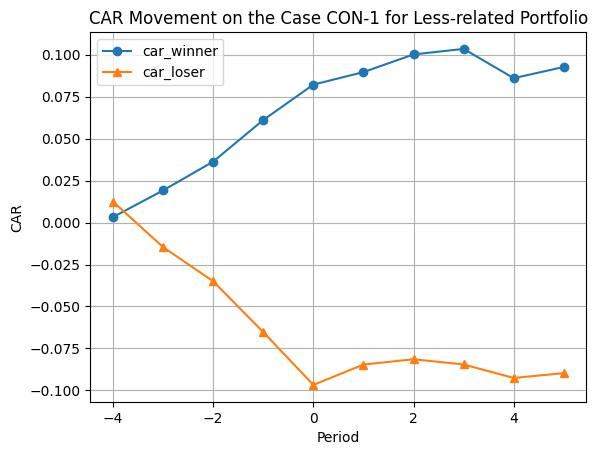

In [24]:
plot_car_winner_loser(winner_loser_comparison=winner_loser_comparison, case_code='CON-1', is_more_related=is_more_related)

[*********************100%***********************]  357 of 357 completed
[*********************100%***********************]  243 of 243 completed


4 Failed downloads:
['PNBS.JK', 'FORU.JK', 'ASDM.JK', 'BLTA.JK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-08-02 00:00:00 -> 2019-08-17 00:00:00)')



[*********************100%***********************]  357 of 357 completed
[*********************100%***********************]  243 of 243 completed
[*********************100%***********************]  357 of 357 completed
[*********************100%***********************]  243 of 243 completed
[*********************100%***********************]  357 of 357 completed
[*********************100%***********************]  243 of 243 completed
[*********************100%***********************]  357 of 357 completed
[*********************100%***********************]  243 of 243 completed
[*********************100%***********************]  357 of 357 completed
[*********************100%***********************]  243 of 243 completed
[*********************100%***********************]  357 of 357 completed
[*********************100%***********************]  243 of 243 completed
[*********************100%***********************]  357 of 357 completed
[*********************100%***********************]

KeyError: 'date'

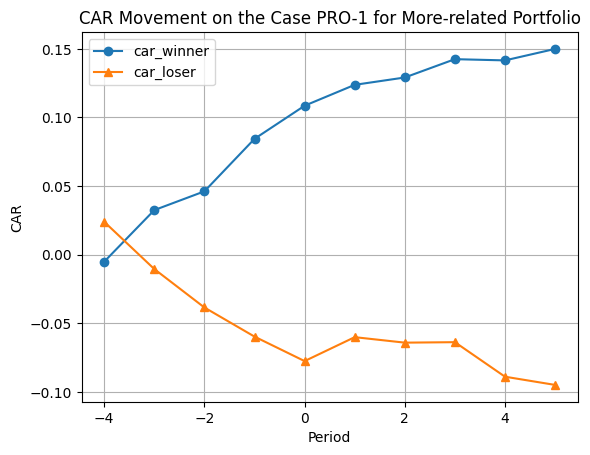

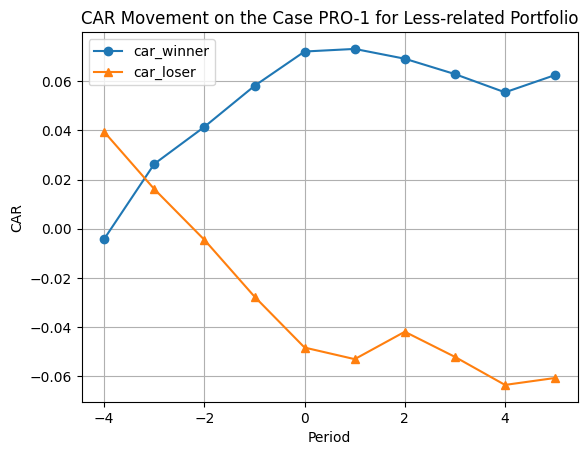

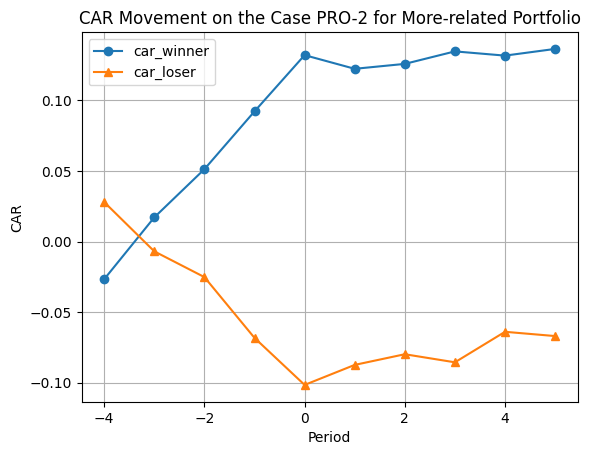

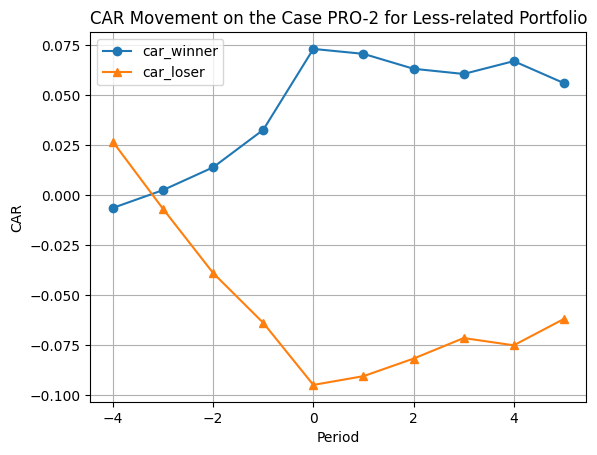

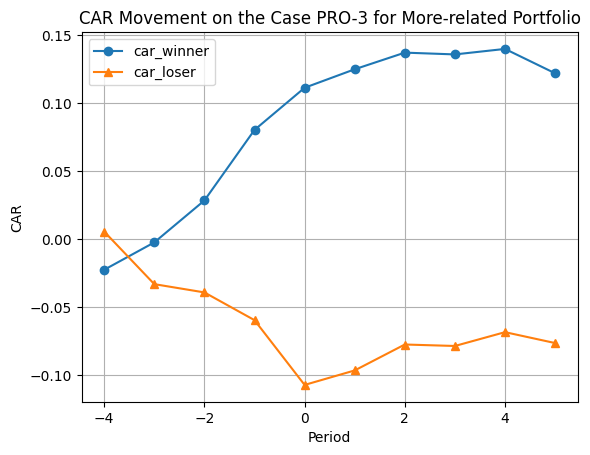

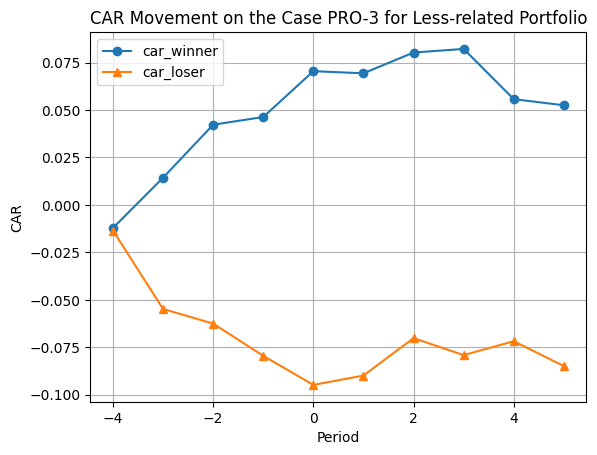

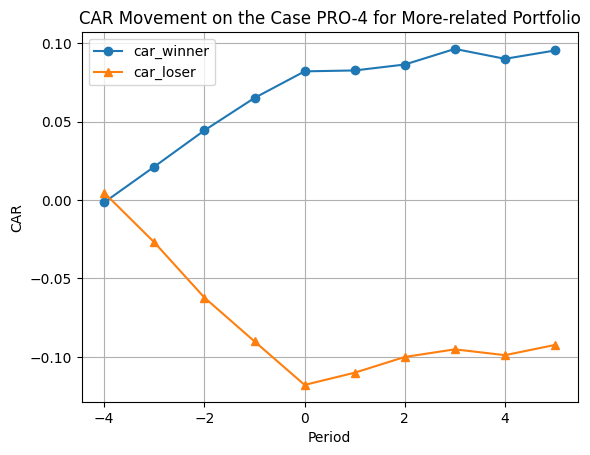

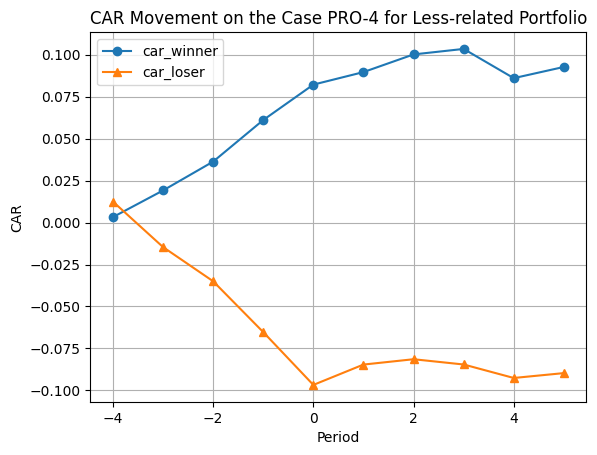

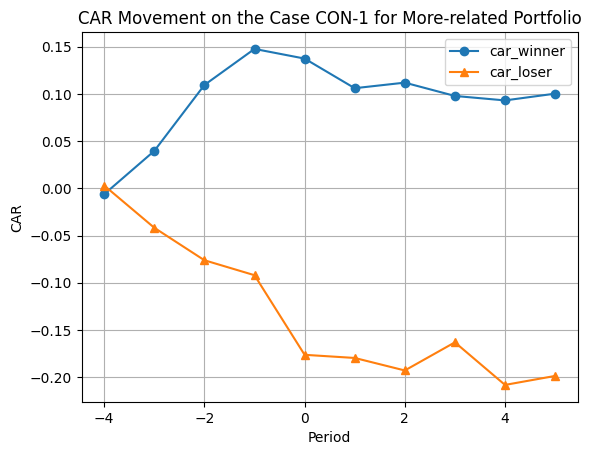

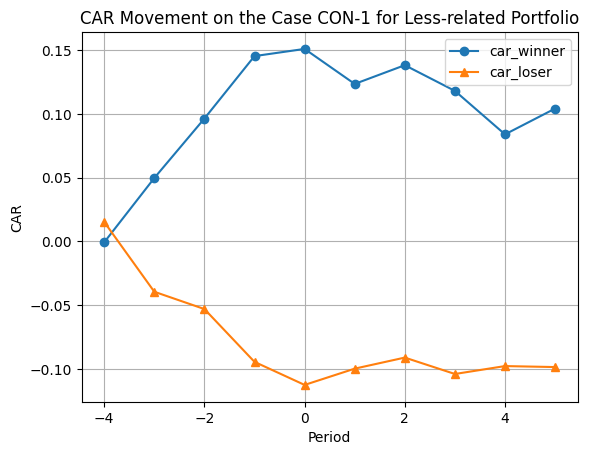

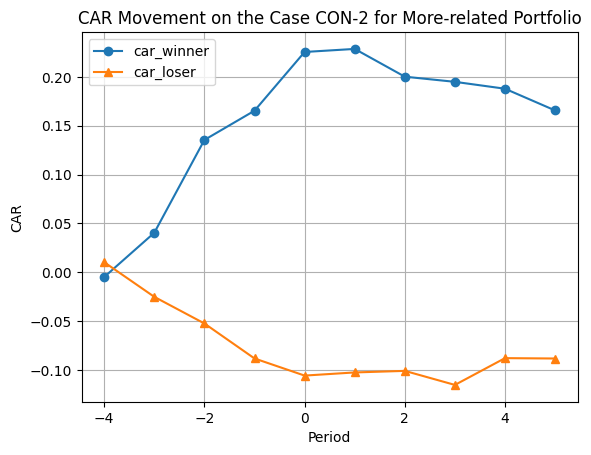

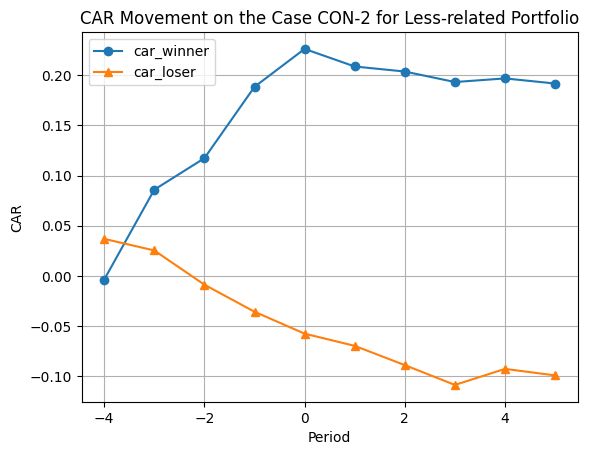

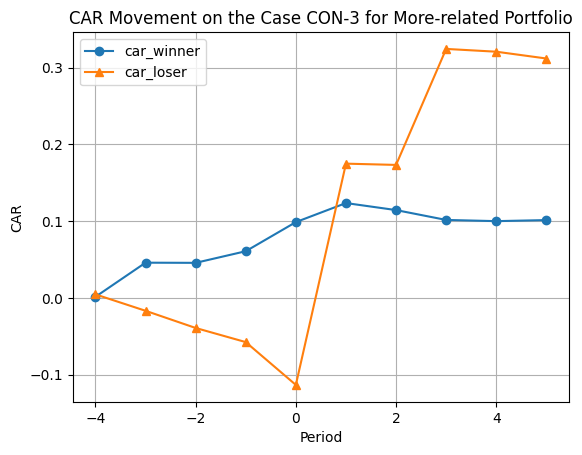

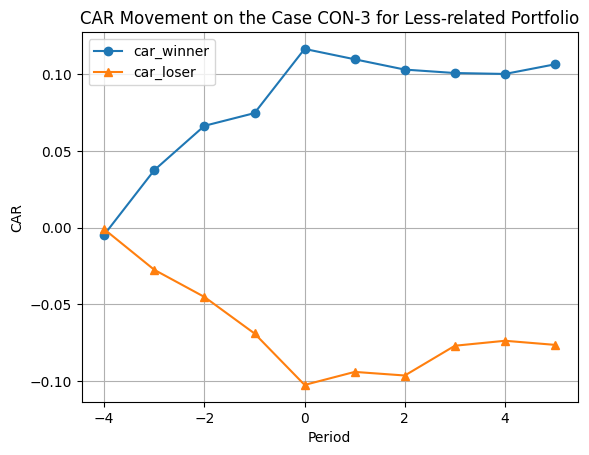

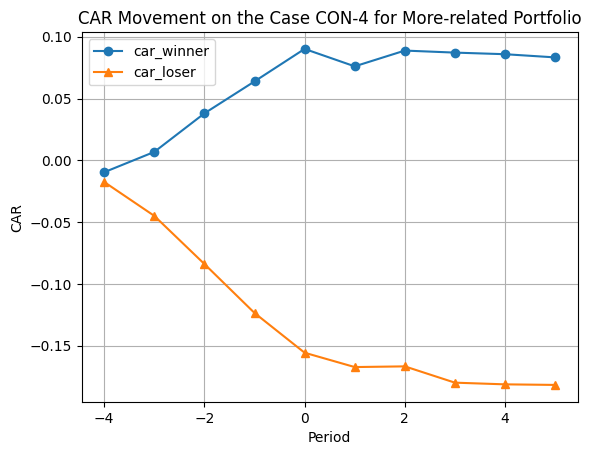

In [25]:
timeline = pd.read_excel('timeline.xlsx', sheet_name='timeline')

pro_or_con_column_name = 'pro_or_con'
pro_or_con_choice = ['PRO', 'CON']
is_more_related_choice = [True, False]

for pro_or_con in pro_or_con_choice:
    selected_pro_or_con = timeline[timeline[pro_or_con_column_name] == pro_or_con]
    for _, case in selected_pro_or_con.iterrows():
        case_code = case['code']
        start_date = case['start_date']
        event_date = case['event_date']
        end_date = case['end_date']

        start_time = datetime.strptime(start_date, '%Y-%m-%d')
        end_time = datetime.strptime(end_date, '%Y-%m-%d')

        returns_of_market = generate_returns_of_market(start_time=start_time, end_time=end_time)

        for is_more_related in is_more_related_choice:
            tickers_stock_prices = generate_stock_prices(start_time=start_time, end_time=end_time, tickers=tickers, is_more_related=is_more_related)
            tickers_return = calculate_tickers_return(tickers_stock_prices=tickers_stock_prices)
            
            winner_tickers_return, loser_tickers_return = select_winner_and_loser_tickers(tickers_stock_prices=tickers_stock_prices, event_date=event_date)
            
            winner_observation_df = init_observation_df(winner_tickers_return)
            loser_observation_df = init_observation_df(loser_tickers_return)

            winner_observation_df = calculate_mu(winner_observation_df)
            loser_observation_df = calculate_mu(loser_observation_df)

            winner_obs_aggr_df = generate_observation_aggregated_df(winner_observation_df)
            loser_obs_aggr_df = generate_observation_aggregated_df(loser_observation_df)

            winner_loser_comparison = generate_winner_loser_comparison(winner_obs_aggr_df=winner_obs_aggr_df, loser_obs_aggr_df=loser_obs_aggr_df)

            plot_car_winner_loser(winner_loser_comparison=winner_loser_comparison, case_code=case_code, is_more_related=is_more_related)
            